# Model exploration

In this notebook we explore how our different model components work.

In [5]:
DATA_PATH = '../data/'

## Image-to-text

In [1]:
from transformers import pipeline

# create image_to_text model
image_to_text = pipeline("image-to-text", model="nlpconnect/vit-gpt2-image-captioning")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
c:\Users\lukas\miniconda3\envs\nlp_venv\lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


### Local images

In [7]:
text = image_to_text(DATA_PATH+"poem_images/0.jpg")[0]["generated_text"]
print("Description: ", text)

c:\Users\lukas\miniconda3\envs\nlp_venv\lib\site-packages\transformers\generation\utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Description:  two pink flowers in a flower pot 


### Online images

Instead of a local path we can also pass an online image URL to the `image_to_text` function.

In [8]:
text = image_to_text("https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2F3.bp.blogspot.com%2F-2pq1tT_bwRQ%2FUSMp_PHAjtI%2FAAAAAAAAThM%2FPX2H_FV13w4%2Fs1600%2FMaple%2BPoetic%2BWallpaper.jpg&f=1&nofb=1&ipt=efde060abd000da0e74c17c7171a6a56909b67445a355f7e04afe2f094360b36&ipo=images")
text = text[0]["generated_text"]
print("Description: ", text)

c:\Users\lukas\miniconda3\envs\nlp_venv\lib\site-packages\transformers\generation\utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Description:  [{'generated_text': 'a painting of a flower arrangement in a flowery sky '}]


### Multiple images

We can give the model a list of images to caption. The model will then caption each image individually.

In [6]:
texts = image_to_text([DATA_PATH+"poem_images/0.jpg", DATA_PATH+"poem_images/3.jpg"])
descriptions = [text[0]["generated_text"] for text in texts]
print("Descriptions: ", descriptions)

c:\Users\lukas\miniconda3\envs\nlp_venv\lib\site-packages\transformers\generation\utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Descriptions:  ['two pink flowers in a flower pot ', 'a row of boats sitting on a dock ']


## Language model - GPT-2

In [8]:
from image_to_poem.language_model.gpt2 import GPT2Model

model_dir = "../models/language_models/model_20231123_190606/model/"

model = GPT2Model(model_dir)

poems = model.generate(num_return_sequences=3)


for i, poem in enumerate(poems):
    print("-"*10 + f"Poem {i+1}" + "-"*10)
    print(poem)
    print()
    

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


----------Poem 1----------
, that I had someone, my thoughts, for each
One, I've gone alone, I'm not alone at home in this garden?
Where I'm like, I've gone to the door. I'm not alone.
That was my face I've gone through the walls
 I will tell you, my dream and my tears;
 you're a child I am alone
, I know you are alone I have a life, I have been
; I'm going

----------Poem 2----------


Where I don't think I'm alone

And I'm dying alone



And I'm lonely
 I think of

We've given him my life

I am not who's too much
And I am not alone
 I am here
 I love and you never leave me alone.
But you're afraid
—I'm not a little you alone
 I am not alone.
My little mind
The shadow of my home
 I don

----------Poem 3----------
 with his own lies.I am with life, but you are aloneAnd you know me, alone alone,
My voice to stop my self

He was alone, to know not from your walls,
The word of our choiceBut that I'm alone and myself will stop;
With no thought I feel alone.

When I am alone, with a fear th

In [9]:
model.generate(prompt="this is a cat")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[" and I am a man in my day\n\nMy own father died alone I'm alone\n and I'm not.\nWho was an angel?\nAll my own\nDon't know\n I am\nThe end all of my soul, no soul.\nThat day I was brokenMy dreamAnd I'm not a thing\n\nMy family, I need a day; I'm alone, the shadow, the dark that is her\nMy father, I cannot make me"]

In [14]:
num_params = 0

params = [param for param in model.model.parameters()]

len(params)

148

## Poem generator

In [1]:
from image_to_poem.poem_generator import PoemGenerator
import matplotlib.pyplot as plt
import json
from PIL import Image

poem_generator = PoemGenerator(lm_model = "../models/language_models/model_20231123_190606/model/")
    
# generate poems from images
poems = poem_generator.image_to_poem(["../data/poem_images/1.jpg", "../data/poem_images/3.jpg"])

Initializing image-to-text model...


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
C:\Users\lukas\AppData\Roaming\Python\Python310\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Initializing language model...


C:\Users\lukas\AppData\Roaming\Python\Python310\site-packages\transformers\generation\utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.
C:\Users\lukas\AppData\Roaming\Python\Python310\site-packages\transformers\generation\utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [2]:
poems

[{'image_path': '../data/poem_images/1.jpg',
  'image_desc': 'a flower arrangement in a vase with other flowers ',
  'generated_poem': "ily upon the earth, and they're not alone, and you find me, and I don't tell the sun, and they make you alone with her heart and and I don't sit, and my life, I've been taught my home, I am like a lonely soul; the dreamers that come into the sky, to think,and all I am alive, and that I'm with the love of my love. a little voice"},
 {'image_path': '../data/poem_images/3.jpg',
  'image_desc': 'a row of boats sitting on a dock ',
  'generated_poem': 'ers face not dying alone and her beauty and those who walk with her own feet,\nWith the night of the cold and the night of your sleep\nAnd my sorrowing and the cold that was. and no life was no me, and I was alone.\nAnd my thoughts and not being alone\nAnd this voice of the old, you are alone\nAnd my heart no voice\n\nBut not you are alone'}]

Image ID: 1
Image URL: https://farm8.staticflickr.com/7434/10024691123_ba6ba177c6.jpg
Image caption: a flower arrangement in a vase with other flowers 


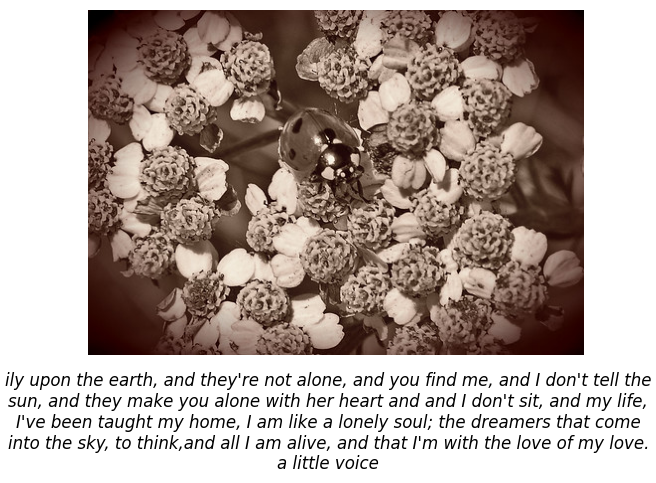

Image ID: 3
Image URL: https://farm2.staticflickr.com/1034/1002997433_0ab78b483e.jpg
Image caption: a row of boats sitting on a dock 


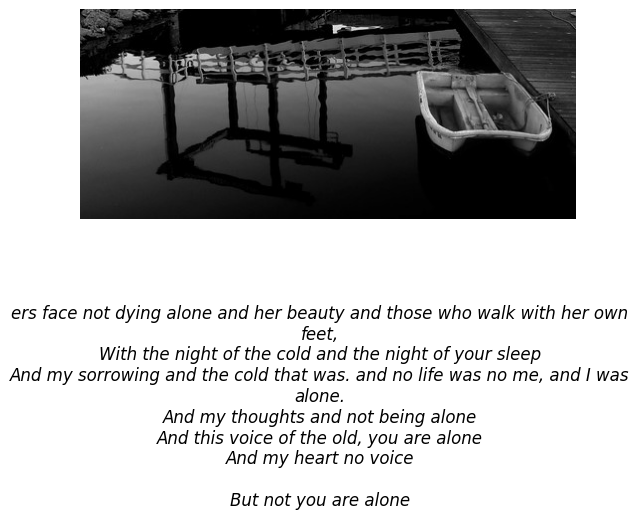

In [3]:
# load image json
image_json = json.load(open("../data/multim_poem.json"))

# choose random image
idxs = [1, 3]

for i, idx in enumerate(idxs):
    # extract from generation
    poem = poems[i]["generated_poem"]
    image_path = poems[i]["image_path"]
    desc = poems[i]["image_desc"]
    
    # print info
    print("Image ID:", image_json[idx]["id"])
    print("Image URL:", image_json[idx]["image_url"])
    print("Image caption:", desc)

    # display image
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')

    y_text = 0.1 if img.size[0] > img.size[1] else img.size[0]/img.size[1]*0.1
    plt.figtext(0.5, y_text, poem, horizontalalignment='center', fontsize=12, verticalalignment ="top", style ="italic", wrap=True)
    # plt.figtext(0.5, y_text, image_json[idx]["poem"], horizontalalignment='center', fontsize=12, verticalalignment ="top", style ="italic", wrap=True)

    plt.show()